# Import packages, set up plotting

In [21]:
import matplotlib.pyplot as plt   
import numpy as np
import gaps_online as go

In [22]:
import os
import scipy as sp

In [23]:
fig = plt.figure(1)
# change the fonts
plt.rc('font',family='serif')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'
plt.rcParams['font.size'] = 12.5
plt.rcParams['axes.linewidth'] = 1

def plotroot(dat, x1, x2, xlab, ylab, title, ylim, xlo=0, log=False):

    fig,ax = plt.subplots(figsize=(9,7))

    # define the bins; 100 evenly spaced between -5 and 5
    bins = np.linspace(x1,x2,100)
    
    # plot the data, using our bin edges
    plt.hist(dat,bins,histtype="step",color="blue")

    # Make a box of parameters in the top right
    bboxd = dict(boxstyle="square", facecolor="w")
    nentries = len(dat)
    mu = np.mean(dat)
    sigma = np.std(dat-mu)
    tbtext = ("Entries   {0:d}\n".format(nentries) + "Mean   {0:.4f}\n".format(mu) + "RMS   {0:.5f}".format(sigma))
    plt.text(.9, 1., tbtext, transform=ax.transAxes, fontsize=10, verticalalignment="top", horizontalalignment="center", bbox=bboxd)

    # Label axes and graph title
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
    if log:
        plt.yscale("log")

    # Change ticks on axes
    ax.minorticks_on()
    ax.tick_params(axis="both",which="both",direction="in")

    # Set x-axis limits
    plt.xlim(xlo,x2)
    plt.ylim(0,ylim)

    # Efficiently use 5 x 5 space
    plt.tight_layout()
    #plt.savefig(title + ".png")
    plt.show()


def plotroot_trunc(dat, x1, x2, xlab, ylab, title, ylim, xlo=0, log=False):

    fig,ax = plt.subplots(figsize=(9,7))

    # define the bins; 100 evenly spaced between -5 and 5
    bins = np.linspace(x1,x2,100)

    # Make a box of parameters in the top right
    bboxd = dict(boxstyle="square", facecolor="w")
    nentries = len(dat)
    mu = np.mean(dat)
    sigma = np.std(dat-mu)

    datarr = np.array(dat)
    trunc1 = datarr[datarr < mu+4*sigma]
    trunc = trunc1[trunc1 > mu-4*sigma]

    mu_t = np.mean(trunc)
    sigma_t = np.std(trunc-mu)
    nentries_t = trunc.size

    outliers = nentries-nentries_t

    # plot the data, using our bin edges
    plt.hist(trunc,bins,histtype="step",color="blue")
    
    tbtext = ("Entries   {0:d}\n".format(nentries_t) + "Mean   {0:.3f}\n".format(mu_t) + "RMS   {0:.5f}\n".format(sigma_t) + "Outliers   {0:d}".format(outliers) )
    plt.text(.9, 1., tbtext, transform=ax.transAxes, fontsize=10, verticalalignment="top", horizontalalignment="center", bbox=bboxd)

    # Label axes and graph title
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
    if log:
        plt.yscale("log")

    # Change ticks on axes
    ax.minorticks_on()
    ax.tick_params(axis="both",which="both",direction="in")

    # Set x-axis limits
    plt.xlim(xlo,x2)
    plt.ylim(0,ylim)

    # Efficiently use 5 x 5 space
    plt.tight_layout()
    #plt.savefig(title + ".png")
    plt.show()



<Figure size 640x480 with 0 Axes>

# Calibration Checking

for each RB channel (360 total), take distribution of 1024 calibration constants and confirm

Tcal: 
- average value between 0.48824 and 0.48834
- standard deviation between 0.08 and 0.15. 

  *Most common problem: avg of tcal distribution is < 0.48824*

Vcal1: 
- average value between 4200 and 5200
- standard deviation less than 150

Vcal2: 
- average value between -0.5 and 0.5
- print out a warning if the standard deviation for any channel is > 5.0

  *Note that ch1 on any particular board has a more dramatic droop so if ch1 droop is the only channel on the board with this warning, it can be ignored*

Vcal3: 
- average value between 0.06 and 0.07
- standard deviation less than 0.00025


## Choose and load calibration files

modified to use rust api

In [24]:
# Current RBs in the GAPS instrument

#files = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "11", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "39", "40", "41", "42", "44", "46"]
files = ["03", "13", "14", "15", "21", "23", "24", "27", "29", "31", "32", "35"]

len(files)


12

In [25]:
calfolder_string = "/home/gaps/csbf-data/calib/20240525/"
filename = sorted(os.listdir(calfolder_string))
filename

['RB03_240525_232633UTC.cali.tof.gaps',
 'RB13_240525_232635UTC.cali.tof.gaps',
 'RB14_240525_232635UTC.cali.tof.gaps',
 'RB15_240525_232635UTC.cali.tof.gaps',
 'RB21_240525_232635UTC.cali.tof.gaps',
 'RB23_240525_232636UTC.cali.tof.gaps',
 'RB24_240525_232632UTC.cali.tof.gaps',
 'RB27_240525_232635UTC.cali.tof.gaps',
 'RB29_240525_232634UTC.cali.tof.gaps',
 'RB31_240525_232633UTC.cali.tof.gaps',
 'RB32_240525_232635UTC.cali.tof.gaps',
 'RB35_240525_232635UTC.cali.tof.gaps',
 'rb_03.cali.tof.gaps',
 'rb_13.cali.tof.gaps',
 'rb_14.cali.tof.gaps',
 'rb_15.cali.tof.gaps',
 'rb_21.cali.tof.gaps',
 'rb_23.cali.tof.gaps',
 'rb_24.cali.tof.gaps',
 'rb_27.cali.tof.gaps',
 'rb_29.cali.tof.gaps',
 'rb_31.cali.tof.gaps',
 'rb_32.cali.tof.gaps',
 'rb_35.cali.tof.gaps']

## Analyze Calibration Constant Distributions

### TCAL: timing bin widths

we want to confirm:

- average value between 0.48824 and 0.48834
- standard deviation between 0.08 and 0.15. 

  *Most common problem: avg of tcal distribution is < 0.48824*

The code below prints out info when values fall outside of these ranges for a particular channel

In [26]:
tcal_avg = []
tcal_std = []

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind]) 
    
    for j in range(9):
        
        tcal_avg.append(np.mean(cal.tbin[j]))
        tcal_std.append(np.std(cal.tbin[j]))
            
        if (np.std(cal.tbin[j]) < 0.08) or (np.std(cal.tbin[j]) > 0.15):
            #plotroot(cal.tbin[j],0,5,"tbin value","tbin count","Cell width RB" + str(cal.rb_id) +" ch" + str(j+1),500,xlo=0,log=True)
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": diff tcal std = " + str(np.std(cal.tbin[j])))


        if (np.mean(cal.tbin[j]) < 0.48824):
            #plotroot(cal.tbin[j],0,5,"tbin value","tbin count","Cell width RB" + str(cal.rb_id) +" ch" + str(j+1),500,xlo=0,log=True)
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": diff tcal mean = " + str(np.mean(cal.tbin[j])))







INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 

RB03_240525_232633UTC.cali.tof.gaps
RB13_240525_232635UTC.cali.tof.gaps
RB14_240525_232635UTC.cali.tof.gaps
RB15_240525_232635UTC.cali.tof.gaps
RB21_240525_232635UTC.cali.tof.gaps
RB23_240525_232636UTC.cali.tof.gaps
RB24_240525_232632UTC.cali.tof.gaps


INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found

RB27_240525_232635UTC.cali.tof.gaps
RB29_240525_232634UTC.cali.tof.gaps
RB31_240525_232633UTC.cali.tof.gaps
RB32_240525_232635UTC.cali.tof.gaps
RB35_240525_232635UTC.cali.tof.gaps


the code below plots the characteristic statistics for all RBs; not strictly necessary for this check

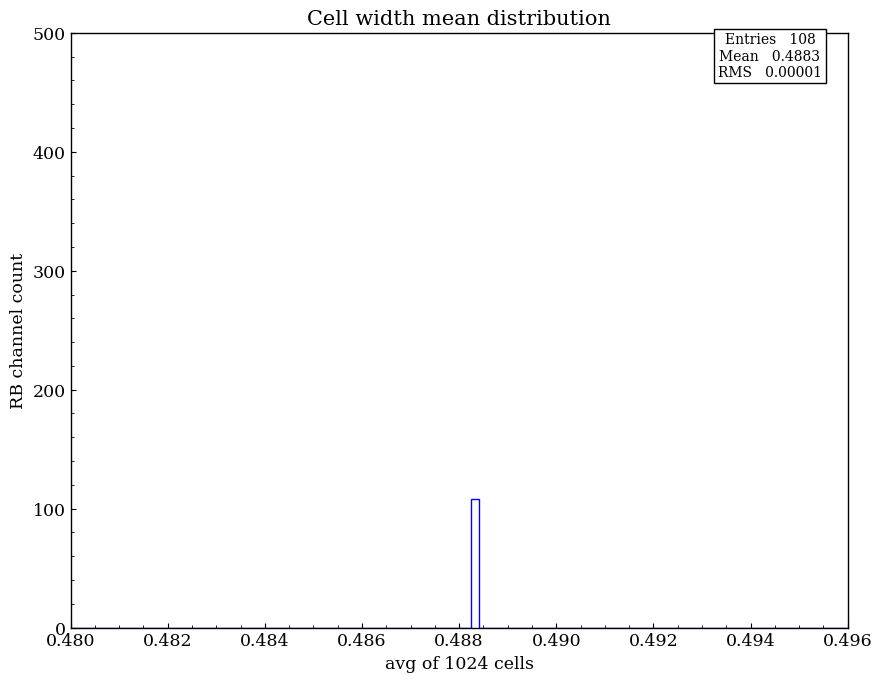

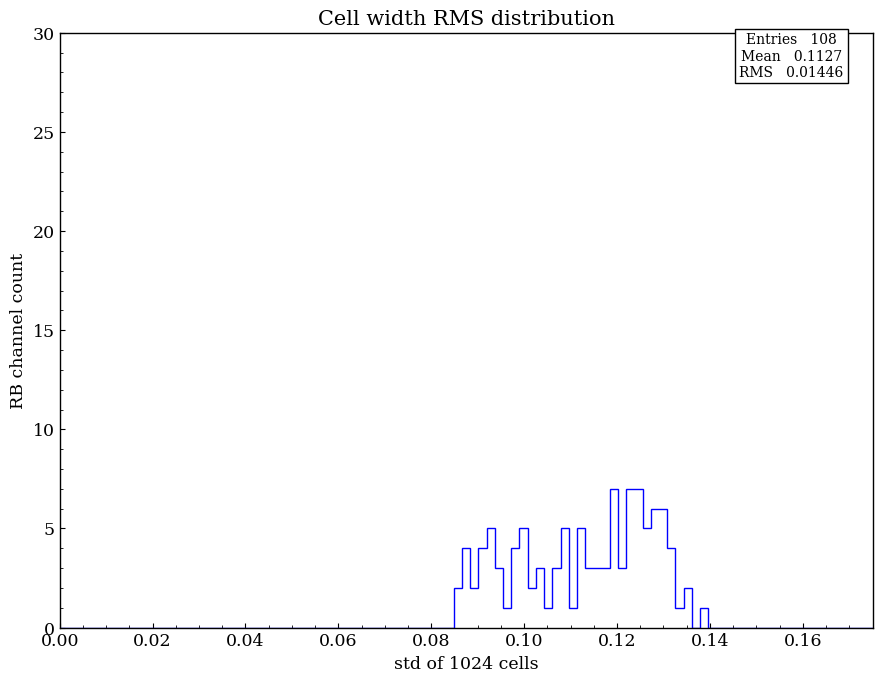

In [27]:
plotroot(tcal_avg,0.48,0.496,"avg of 1024 cells","RB channel count","Cell width mean distribution",500,xlo=0.48)
plotroot(tcal_std,0,0.175,"std of 1024 cells","RB channel count","Cell width RMS distribution",30,xlo=0)

the code below is an example for plotting the tbin distribution for channels where low RMS or mean not equal to 0.488 have been indicated. you can also use this to plot "good" channels for comparison. not strictly necessary for this check

In [ ]:
#choose ind value for RB you want to investigate
ind=0
print(filename[ind])
#cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

for j in range(9):

    plotroot(cal.tbin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in " +filename[ind]+ ", ch" + str(j),100)


ind=24
print(filename[ind])
#cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

for j in range(9):

    plotroot(cal.tbin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in " +filename[ind]+ ", ch" + str(j),100)


ind=35
print(filename[ind])
#cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

for j in range(9):

    plotroot(cal.tbin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in" + filename[ind] + ", ch" + str(j),100)



### VCAL1: fixed ADC offset

we want to confirm:

- average value between 4200 and 5200
- standard deviation less than 150

The code below prints out info when values fall outside of these ranges for a particular channel

In [29]:
vcal_1_avg = []
vcal_1_std = []

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind]) 

    
    for j in range(9):

        vcal_1_avg.append(np.mean(cal.v_offsets[j]))
        vcal_1_std.append(np.std(cal.v_offsets[j]))

       # if j==4 and ind == 0:
       #     plotroot(cal.v_offsets[j],3500,6000,"bin value","count","fixed ADC offset RB1 ch5",100,xlo=3500)

        if (np.mean(cal.v_offsets[j]) > 5200):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_offset mean = " + str(np.mean(cal.v_offsets[j])))
        if (np.mean(cal.v_offsets[j]) < 4200):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": low v_offset mean = " + str(np.mean(cal.v_offsets[j])))
        if (np.std(cal.v_offsets[j]) > 150):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_offset std = " + str(np.std(cal.v_offsets[j])))

INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 

RB03_240525_232633UTC.cali.tof.gaps
RB13_240525_232635UTC.cali.tof.gaps
RB14_240525_232635UTC.cali.tof.gaps
RB15_240525_232635UTC.cali.tof.gaps
RB21_240525_232635UTC.cali.tof.gaps
RB23_240525_232636UTC.cali.tof.gaps
RB24_240525_232632UTC.cali.tof.gaps


INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 TCal data events!
INFO:tof_dataclasses.calibrations:Found

RB27_240525_232635UTC.cali.tof.gaps
RB29_240525_232634UTC.cali.tof.gaps
RB31_240525_232633UTC.cali.tof.gaps
RB32_240525_232635UTC.cali.tof.gaps
RB35_240525_232635UTC.cali.tof.gaps


the code below plots the characteristic statistics for all RBs; not strictly necessary for this check

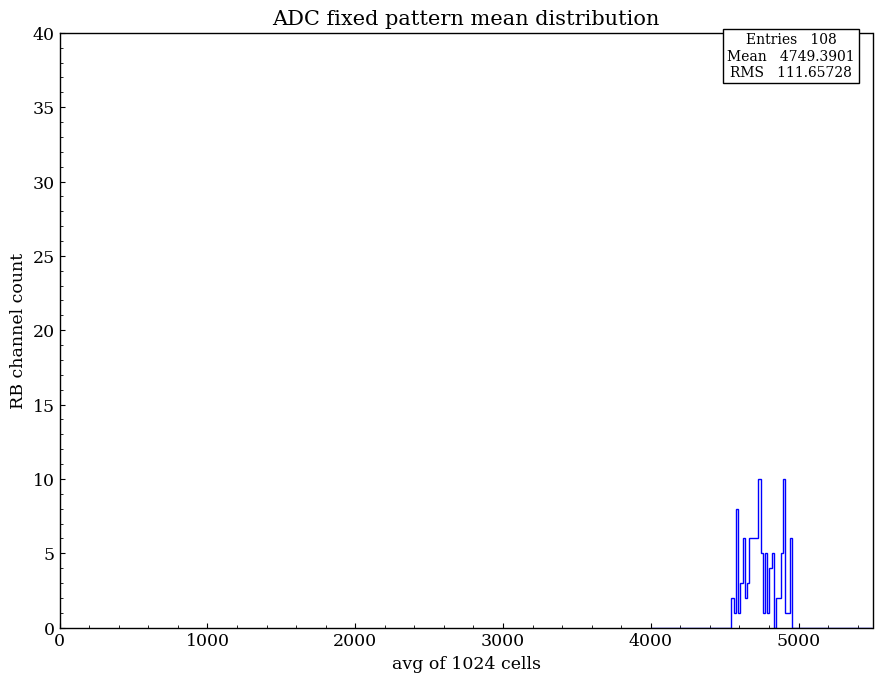

  plt.ylim(0,ylim)



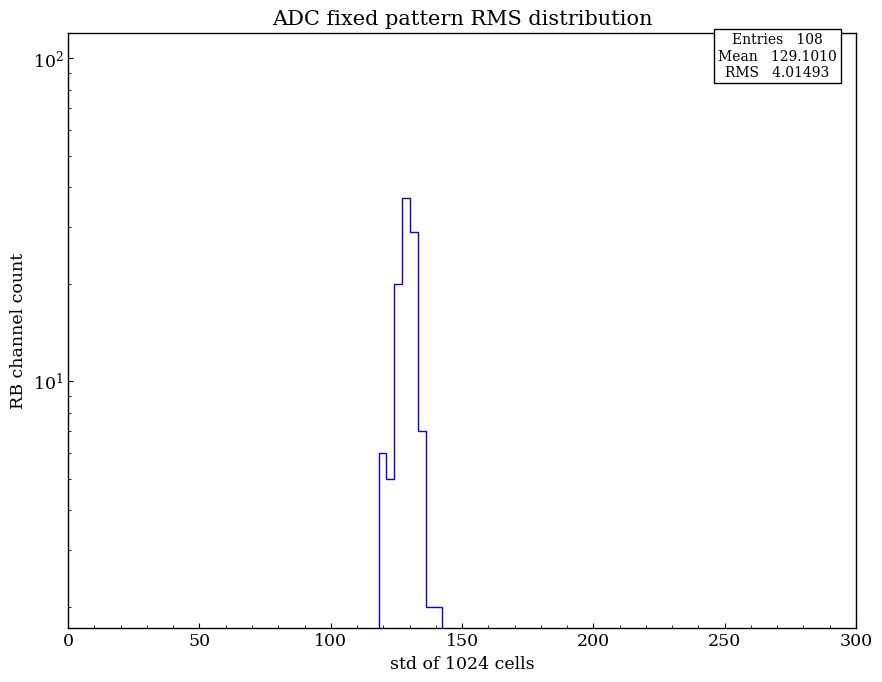

In [30]:
plotroot(vcal_1_avg,4000,5500,"avg of 1024 cells","RB channel count","ADC fixed pattern mean distribution",40)
plotroot(vcal_1_std,0,300,"std of 1024 cells","RB channel count","ADC fixed pattern RMS distribution",120,log=True)

the code below is an example for plotting the vcal1 distribution for channels where high RMS or outlier averages have been indicated. you can also use this to plot "good" channels for comparison. not strictly necessary for this check

In [ ]:
#cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[24])

#choose ind value for RB, ch you want to investigate
ind=4
ch=8

cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

plotroot(cal.v_offsets[ch],1000,9500,"avg of 1024 cells","RB channel count","ADC fixed pattern mean distribution",40)


### VCAL2: droop

we want to confirm:

- average value between -0.5 and 0.5
- print out a warning if the standard deviation for any channel is > 5.0
  
  *Note that ch1 on any particular board has a more dramatic droop so if ch1 droop is the only channel on the board with this warning, it can be ignored*

The code below prints out info when values fall outside of these ranges for a particular channel

In [35]:
vcal_2_avg = []
vcal_2_std = []

for ind in range(len(files)):

    print(filename[ind])
    #cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind]) 

    
    for j in range(9):

        vcal_2_avg.append(np.mean(cal.v_dips[j]))
        vcal_2_std.append(np.std(cal.v_dips[j]))

        #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        
        if (np.std(cal.v_dips[j]) > 5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_dip std = " + str(np.std(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        if (np.mean(cal.v_dips[j]) < -0.5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": low v_dip mean = " + str(np.mean(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        if (np.mean(cal.v_dips[j]) > 0.5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_dip mean = " + str(np.mean(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)

INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 

RB03_240525_232633UTC.cali.tof.gaps
RB 3 Ch 1: high v_dip std = 5.4850273
RB13_240525_232635UTC.cali.tof.gaps
RB 13 Ch 1: high v_dip std = 5.7298517
RB14_240525_232635UTC.cali.tof.gaps
RB 14 Ch 1: high v_dip std = 5.073127
RB15_240525_232635UTC.cali.tof.gaps
RB 15 Ch 1: high v_dip std = 5.878442
RB21_240525_232635UTC.cali.tof.gaps
RB 21 Ch 1: high v_dip std = 5.1971774
RB23_240525_232636UTC.cali.tof.gaps
RB24_240525_232632UTC.cali.tof.gaps


INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found

RB 24 Ch 1: high v_dip std = 5.3620276
RB27_240525_232635UTC.cali.tof.gaps
RB 27 Ch 1: high v_dip std = 5.4469447
RB29_240525_232634UTC.cali.tof.gaps
RB31_240525_232633UTC.cali.tof.gaps
RB32_240525_232635UTC.cali.tof.gaps
RB 32 Ch 1: high v_dip std = 5.063201
RB35_240525_232635UTC.cali.tof.gaps
RB 35 Ch 1: high v_dip std = 5.4434934


 *again: ch1 on any particular board has a more dramatic droop so if ch1 droop is the only channel on the board with this warning, it can be ignored*

the code below plots the characteristic statistics for all RBs; not strictly necessary for this check

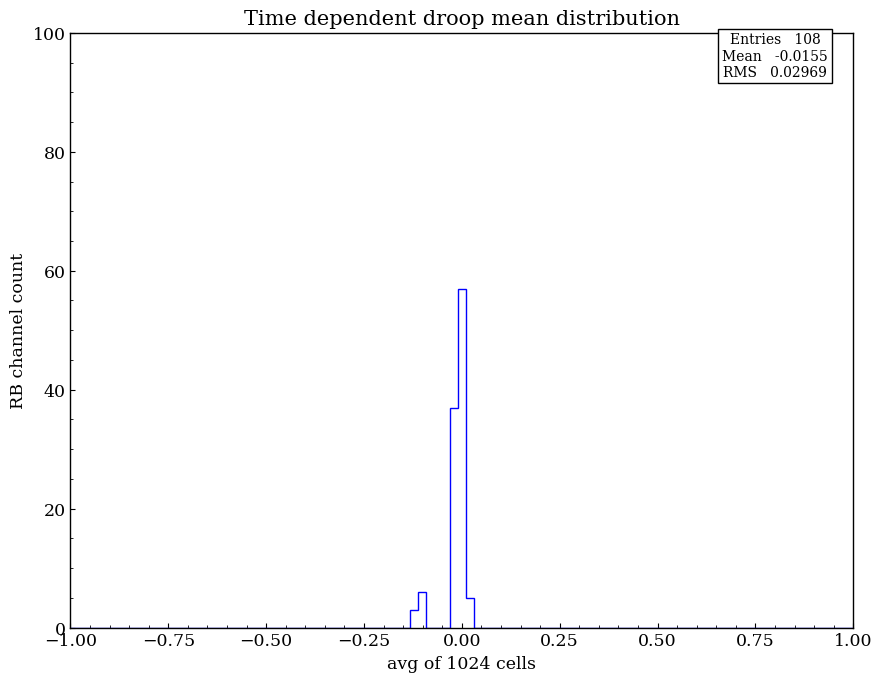

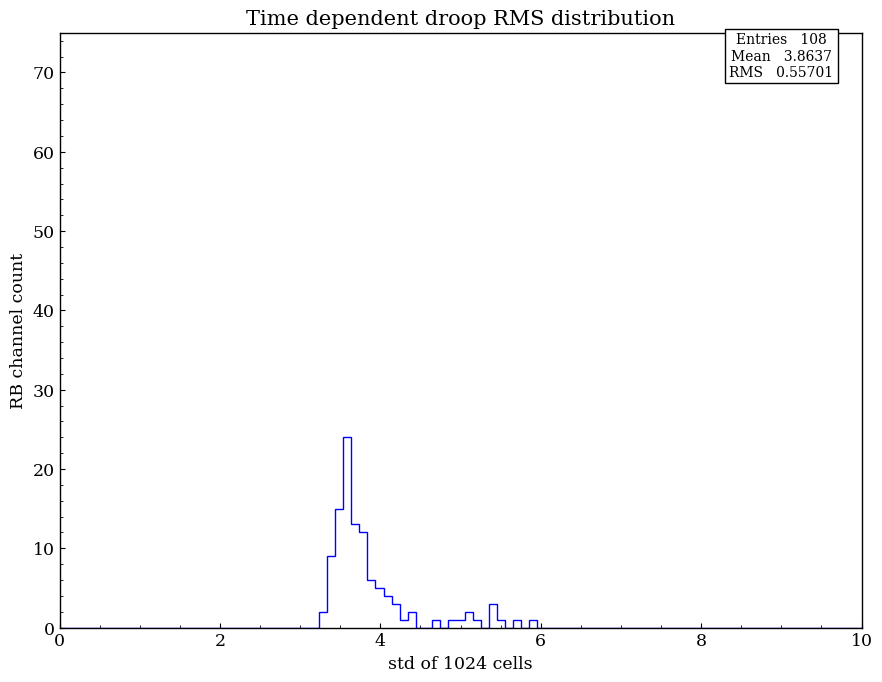

In [36]:
plotroot(vcal_2_avg,-1,1,"avg of 1024 cells","RB channel count","Time dependent droop mean distribution",100, xlo=-1)
plotroot(vcal_2_std,0,10,"std of 1024 cells","RB channel count","Time dependent droop RMS distribution",75)

the code below is an example for plotting the vcal2 distribution for channels where high RMS or mean not close to 0 have been indicated. you can also use this to plot "good" channels for comparison. not strictly necessary for this check

In [ ]:
#cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[1])

#choose ind value for RB you want to investigate
ind = 1
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

for j in range(9):

    plotroot(cal.v_dips[j],-10,10,"Vdip value","cell count","Time Dependent Droop for 1024 cells in RB1, ch" + str(j),100,xlo=-10)

In [ ]:
#cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[2])

#choose ind value for good RB you want to compare
ind=2
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind]) 

for j in range(3):

    plotroot(cal.v_dips[j],-10,10,"Vdip value","cell count","Time Dependent Droop for 1024 cells in RB4, ch" + str(j),100,xlo=-10)

### VCAL3: Gain

we want to confirm:

- average value between 0.06 and 0.07
- standard deviation less than 0.00025

The code below prints out info when values fall outside of these ranges for a particular channel

In [21]:
vcal_3_avg = []
vcal_3_std = []

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind]) 

    
    for j in range(9):

        vcal_3_avg.append(np.mean(cal.v_inc[j]))
        vcal_3_std.append(np.std(cal.v_inc[j]))

        if (np.std(cal.v_inc[j]) > 0.00025):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high gain std = " + str(np.std(cal.v_inc[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        




INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 

RB03_240525_232633UTC.cali.tof.gaps
RB13_240525_232635UTC.cali.tof.gaps
RB14_240525_232635UTC.cali.tof.gaps
RB15_240525_232635UTC.cali.tof.gaps
RB21_240525_232635UTC.cali.tof.gaps
RB23_240525_232636UTC.cali.tof.gaps
RB24_240525_232632UTC.cali.tof.gaps
RB27_240525_232635UTC.cali.tof.gaps
RB29_240525_232634UTC.cali.tof.gaps


INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 TCal data events!
INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 999 TCal data events!


RB31_240525_232633UTC.cali.tof.gaps
RB32_240525_232635UTC.cali.tof.gaps
RB35_240525_232635UTC.cali.tof.gaps


the code below plots the characteristic statistics for all RBs; not strictly necessary for this check

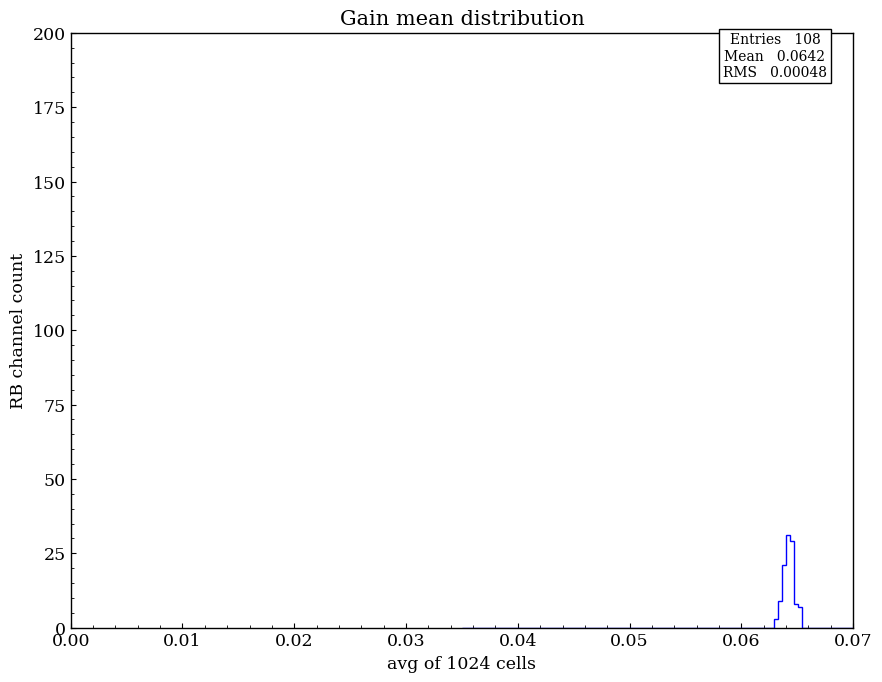

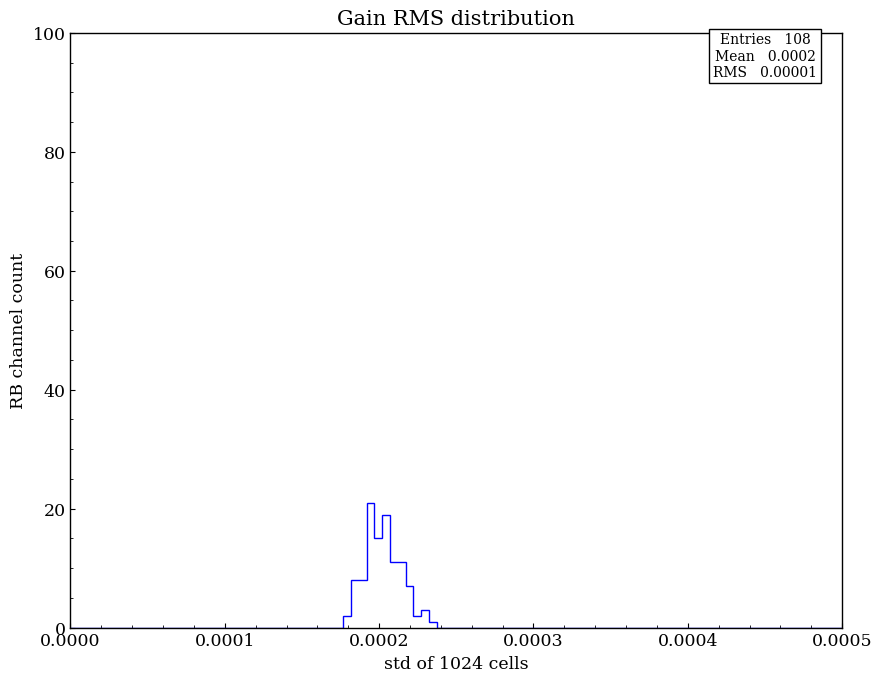

  plt.ylim(0,ylim)



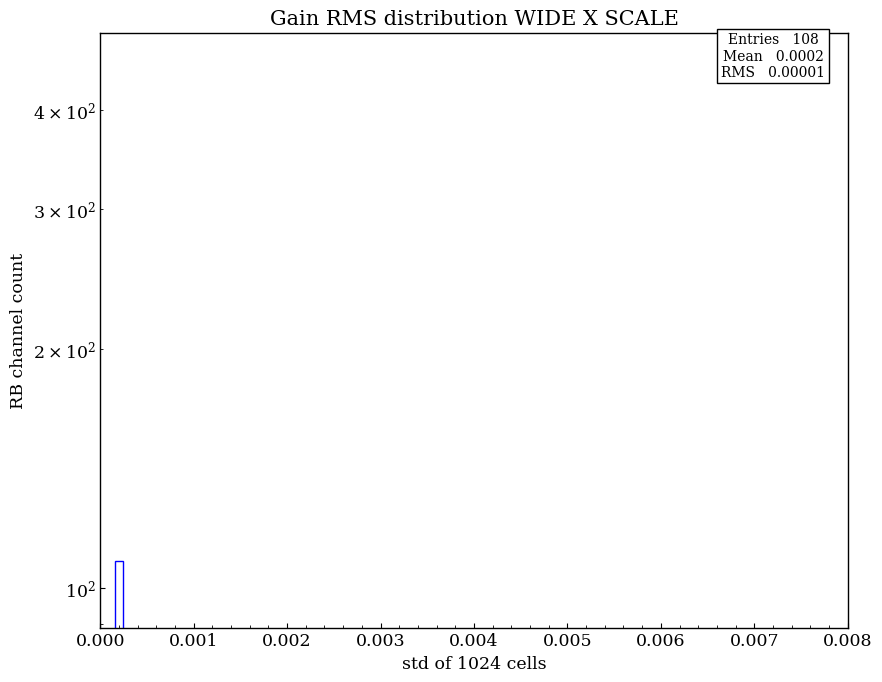

In [22]:
plotroot(vcal_3_avg,0.035,0.07,"avg of 1024 cells","RB channel count","Gain mean distribution",200)
plotroot(vcal_3_std,0,0.0005,"std of 1024 cells","RB channel count","Gain RMS distribution",100)
plotroot(vcal_3_std,0,0.008,"std of 1024 cells","RB channel count","Gain RMS distribution WIDE X SCALE",500,log=True)

I have never used the vcal3 distributions to diagnose a problem, and there have never been issues with this calibration constant which was not also apparent by looking at another calibration constant distribution (in particular vcal1). For this reason, I do not have code to look at individual vcal3 distributions and I do not think it is important to write any

## Plot Statistics for NOI and VCAL events

I do not think that checking the NOI data is useful, since we will be basically doing the same thing when we look at pedestal data in later checks. We could check the “ped” and “pedRMS” values for the VCAL data, but I have never seen any problems with the VCAL data which didn’t also appear in the calibration constant distributions, nor have I ever used it to diagnose an issue.

So, I don't think we need to consider anything below

### NOI data: 0mV

pedestal and pedRMS values are plotted for NOI events taken in the calibration data stream 

In [16]:
noi_ped = []
noi_pedrms = []

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind],discard_data = False) 
    print(len(cal.noi_data))

    for i in range(0,len(cal.noi_data),1):
    
        ADC = cal.noi_data[i]
        for j in range(9):

            wave = cal.voltages(ADC,spike_cleaning=False)[j]
        
            rms_temp = np.std(wave[50:900])
            noi_pedrms.append(rms_temp)

            if (rms_temp > 2):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high NOI pedRMS = " + str(rms_temp))
                
                #ADC = cal.noi_data[i]
                #fig,ax = plt.subplots(figsize=(15,5))

                #volts = cal.voltages(ADC,j+1)
                #times = cal.nanoseconds(ADC,j+1)

                #plt.plot(times,volts, label=" Ch " + str(j))
                ##plt.plot((np.roll(times,-1)-times[0])[:-2],volts[:-2], label="tbins shifted 1")
                #plt.title("NOI for RB " + str(cal.rb_id) + " Ev " + str(i))
                #plt.legend()
                ##plt.ylim(-30,200)
                ##plt.xlim(-1,100)
                #plt.grid()
                #plt.show()
            
            mean_temp = np.mean(wave[50:900])
            noi_ped.append(mean_temp)

            if (mean_temp > 1.5) or (mean_temp < -1.5):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high NOI ped = " + str(mean_temp))

INFO:tof_dataclasses.calibrations:Found 1000 no input data events!
INFO:tof_dataclasses.calibrations:Found 1000 VCal data events!
INFO:tof_dataclasses.calibrations:Found 998 TCal data events!


RB03_240525_232633UTC.cali.tof.gaps
1000


AttributeError: 'builtins.RBCalibration' object has no attribute 'voltages'

  return _methods._mean(a, axis=axis, dtype=dtype,

  ret = ret.dtype.type(ret / rcount)

  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,

  arrmean = um.true_divide(arrmean, div, out=arrmean,

  ret = ret.dtype.type(ret / rcount)

  plt.yscale("log")

  plt.ylim(0,ylim)



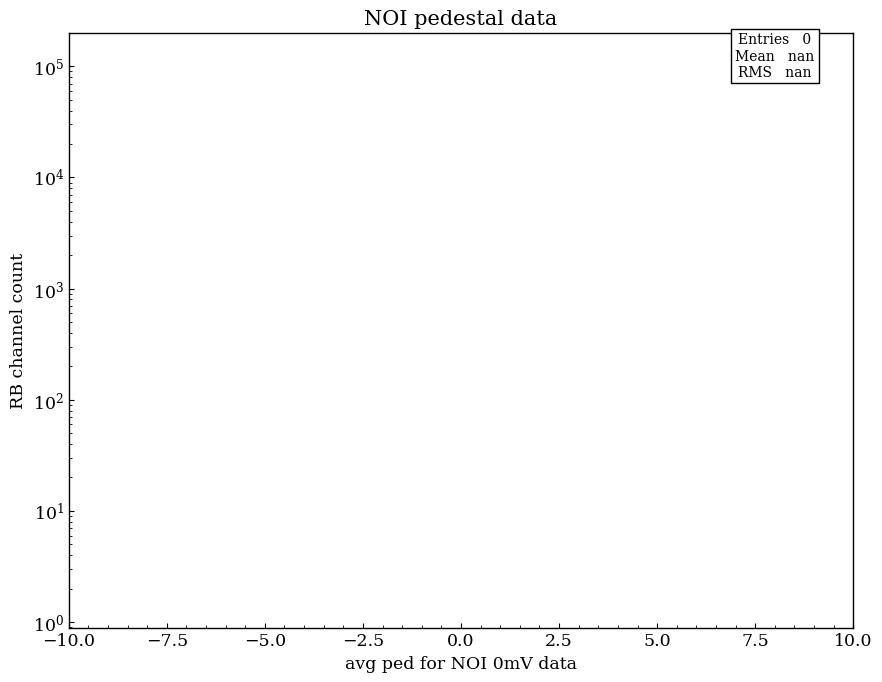

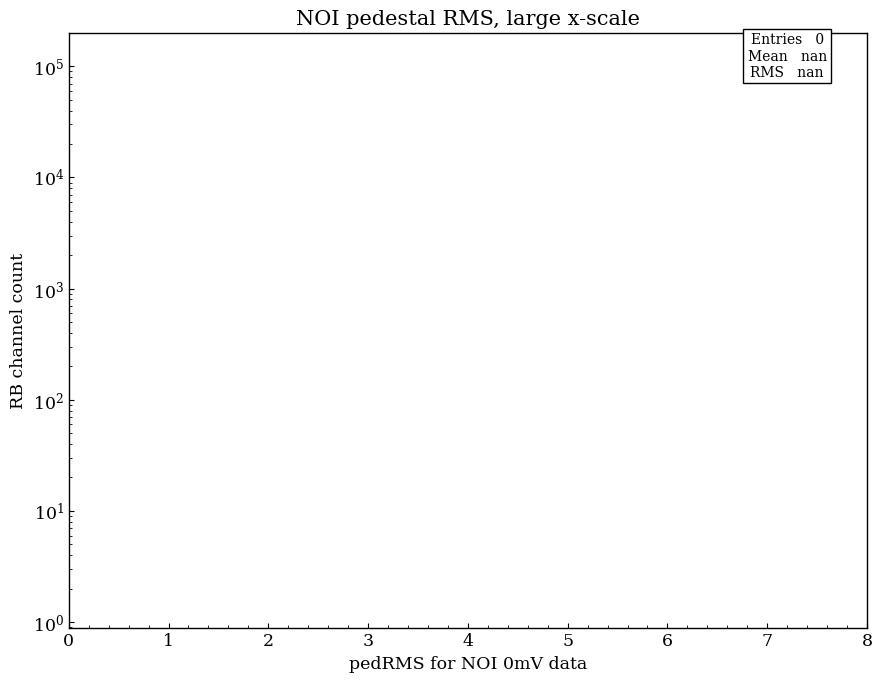

In [30]:
plotroot(noi_ped,-10,10,"avg ped for NOI 0mV data","RB channel count","NOI pedestal data",200000, xlo=-10,log=True)
plotroot(noi_pedrms,0,8,"pedRMS for NOI 0mV data","RB channel count","NOI pedestal RMS, large x-scale",200000, log=True)




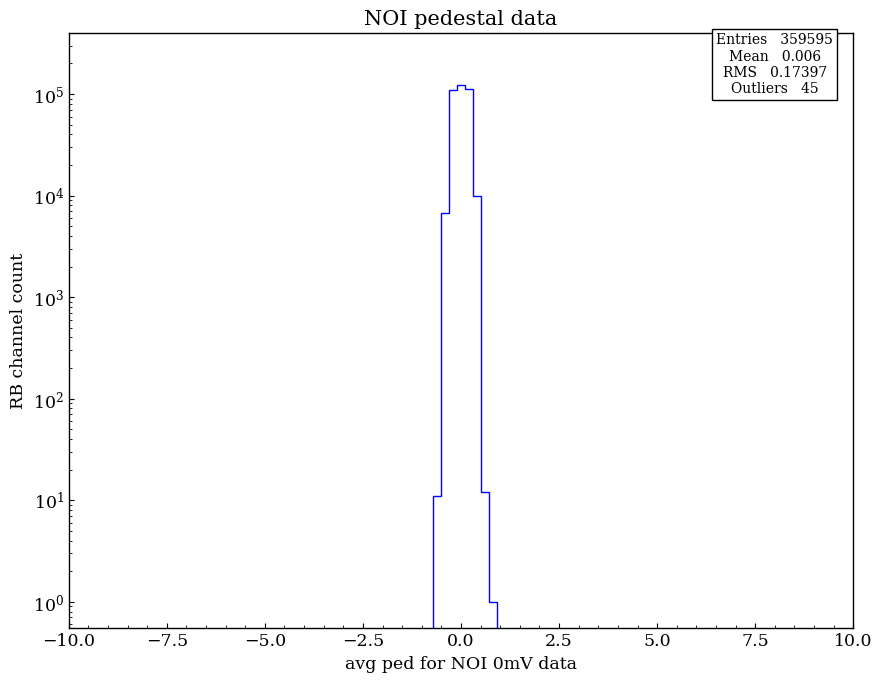

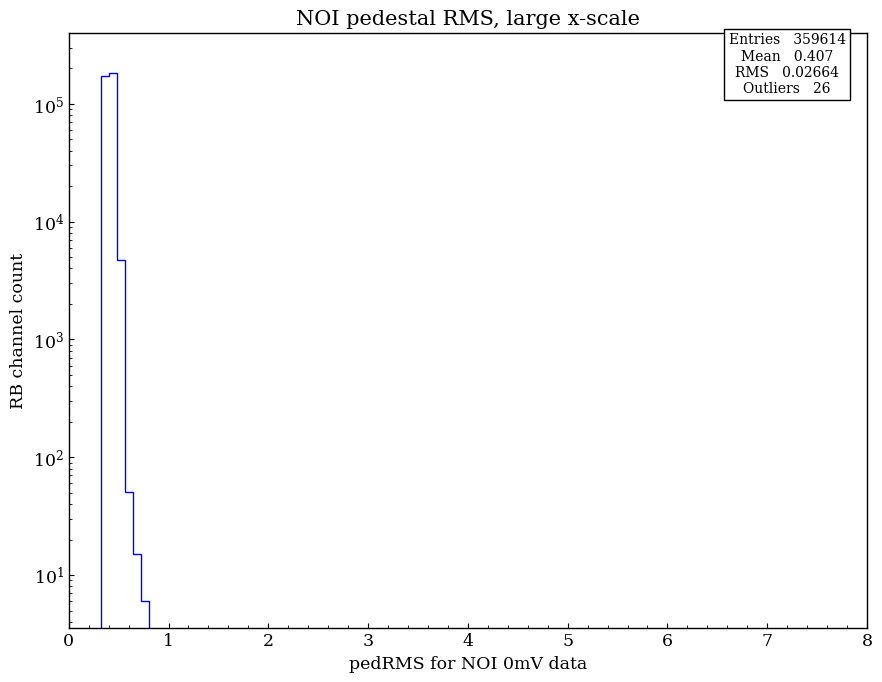

In [13]:
plotroot_trunc(noi_ped,-10,10,"avg ped for NOI 0mV data","RB channel count","NOI pedestal data",400000, xlo=-10,log=True)
plotroot_trunc(noi_pedrms,0,8,"pedRMS for NOI 0mV data","RB channel count","NOI pedestal RMS, large x-scale",400000, log=True)



check for pedRMS and ped mean outliers

the code below looks at first 70 events to check suspicious NOI data for data mangling

In [ ]:
#cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[33])

#choose ind value for RB you want to investigate
ind=33
cal = go.rust_api.events.RBCalibration()
cal.from_file(calfolder_string + filename[ind],discard_data = False)



for i in range(70):
    
    ADC = cal.noi_data[i]
    fig,ax = plt.subplots(figsize=(15,5))
    for j in range(9):

        volts = cal.voltages(ADC,j+1)
        times = cal.nanoseconds(ADC,j+1)

        plt.plot(times,volts, label=" Ch " + str(j))
        #plt.plot((np.roll(times,-1)-times[0])[:-2],volts[:-2], label="tbins shifted 1")
    plt.title("NOI for RB " + str(cal.rb_id) + " Ev " + str(i))
    plt.legend()
    plt.ylim(-30,200)
    #plt.xlim(-1,100)
    plt.grid()
    plt.show()

### VCAL data: 182mV

pedestal and pedRMS values are plotted for 999 VCAL events taken in the calibration data stream 

In [20]:
cal.vcal_data[10]?

Type:        RBEvent
String form:
<PyO3Wrapper: <RBEvent
           data type     : <DataType: "VoltageCalibration">,
           event status  : <Ev <...>  [ch 7('8') 7389,7658,7527,7521,7510,..:1024]
           ]
           ,
           n hits        : 0,
           .. .. .. .. .. .. .. .. >>

In [18]:
vcal_ped = []
vcal_pedrms = []

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind],discard_data = False)

    for i in range(0,len(cal.vcal_data),1):

        ADC = cal.vcal_data[i]
        for j in range(9):

            wave = cal.voltages(ADC,spike_cleaning=False)[j]
        
            rms_temp = np.std(wave[50:900])
            vcal_pedrms.append(rms_temp)
            mean_temp = np.mean(wave[50:900])
            vcal_ped.append(mean_temp)

            if (rms_temp > 2):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high VCAL pedRMS = " + str(rms_temp))
                

            if (mean_temp > 182.8):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high VCAL ped = " + str(mean_temp) + ", RMS = " + str(rms_temp))

             if (mean_temp < 179):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": low VCAL ped = " + str(mean_temp) + ", RMS = " + str(rms_temp))
                

RB01_2024_03_13-22_08_28.cali.tof.gaps
RB02_2024_03_13-22_08_21.cali.tof.gaps
RB 2 Ch 1 Ev 865: high VCAL ped = 187.02908, RMS = 0.8197466
RB 2 Ch 2 Ev 865: high VCAL ped = 187.04448, RMS = 0.79435706
RB 2 Ch 3 Ev 865: high VCAL ped = 187.10452, RMS = 0.8067746
RB 2 Ch 4 Ev 865: high VCAL ped = 187.12732, RMS = 0.8041474
RB 2 Ch 5 Ev 865: high VCAL ped = 187.12189, RMS = 0.7913191
RB 2 Ch 6 Ev 865: high VCAL ped = 187.19412, RMS = 0.81630886
RB 2 Ch 7 Ev 865: high VCAL ped = 187.21245, RMS = 0.7945887
RB 2 Ch 8 Ev 865: high VCAL ped = 187.21191, RMS = 0.78943276
RB 2 Ch 9 Ev 865: high VCAL ped = 187.1418, RMS = 0.7045429
RB03_2024_03_13-22_08_34.cali.tof.gaps
RB04_2024_03_13-22_08_21.cali.tof.gaps
RB05_2024_03_13-22_08_19.cali.tof.gaps
RB06_2024_03_13-22_08_21.cali.tof.gaps
RB07_2024_03_13-22_08_19.cali.tof.gaps
RB08_2024_03_13-22_08_29.cali.tof.gaps
RB09_2024_03_13-22_08_29.cali.tof.gaps
RB11_2024_03_13-22_08_28.cali.tof.gaps
RB13_2024_03_13-22_08_35.cali.tof.gaps
RB14_2024_03_13-22_0

  plt.ylim(0,ylim)



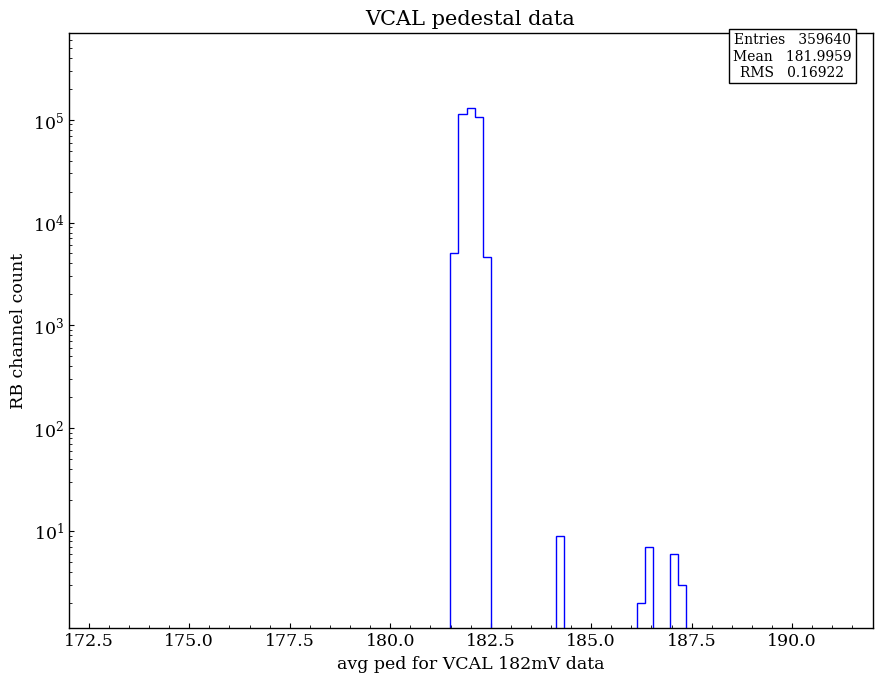

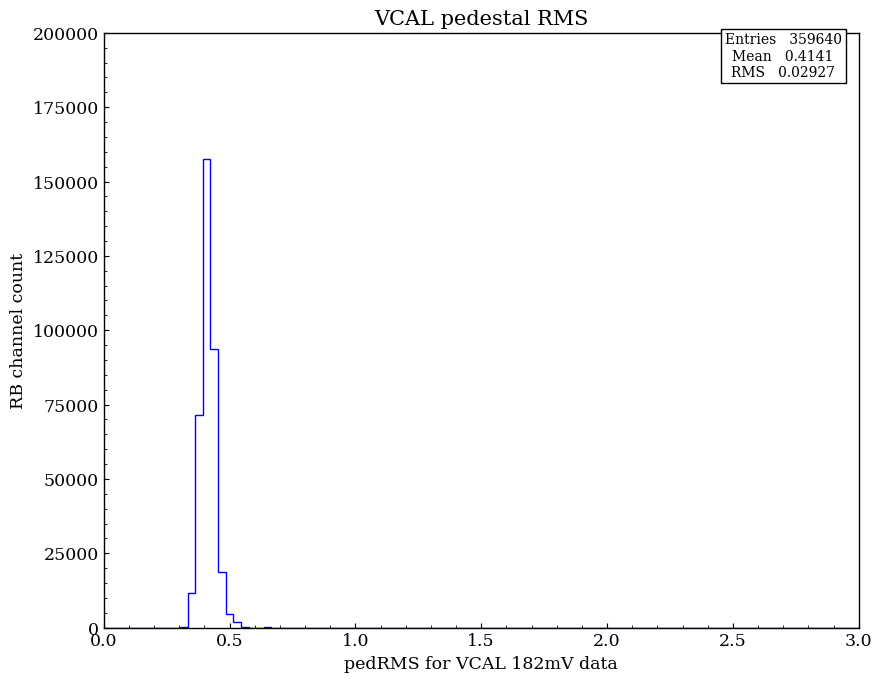

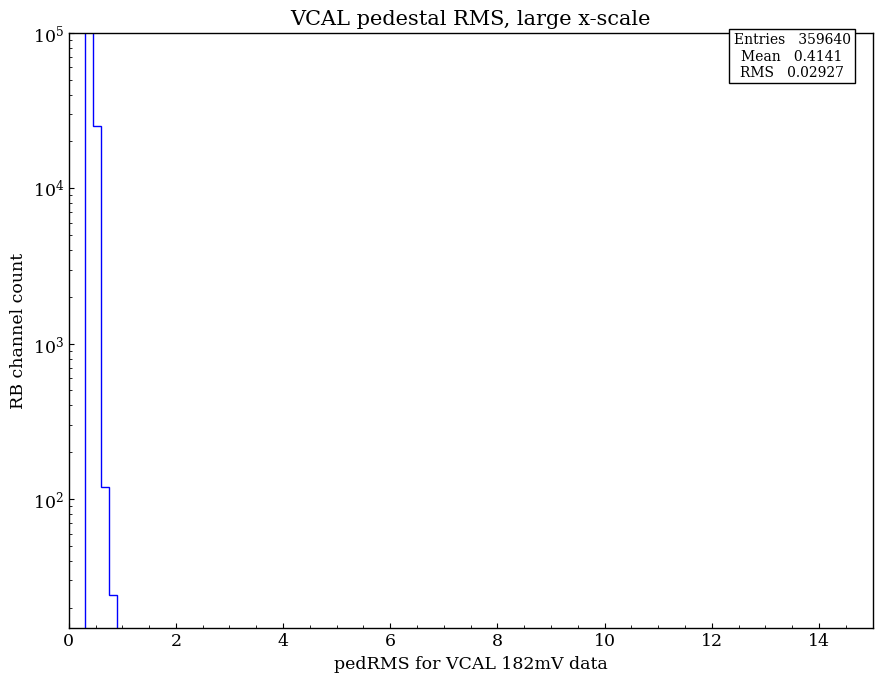

In [17]:
plotroot(vcal_ped,172,192,"avg ped for VCAL 182mV data","RB channel count","VCAL pedestal data",700000,xlo=172,log=True)
plotroot(vcal_pedrms,0,3,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS",200000)
plotroot(vcal_pedrms,0,15,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS, large x-scale",100000, log=True)

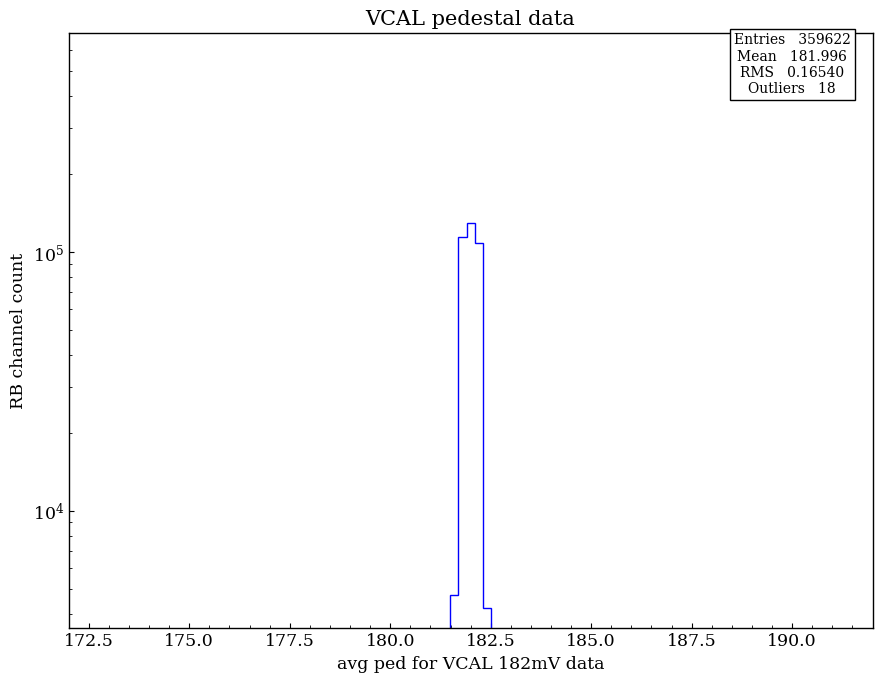

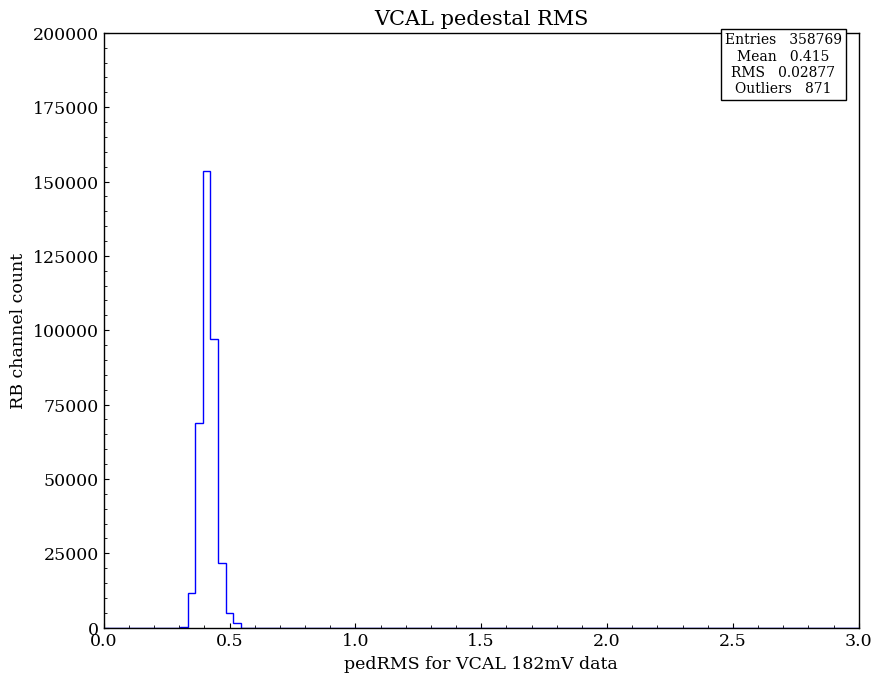

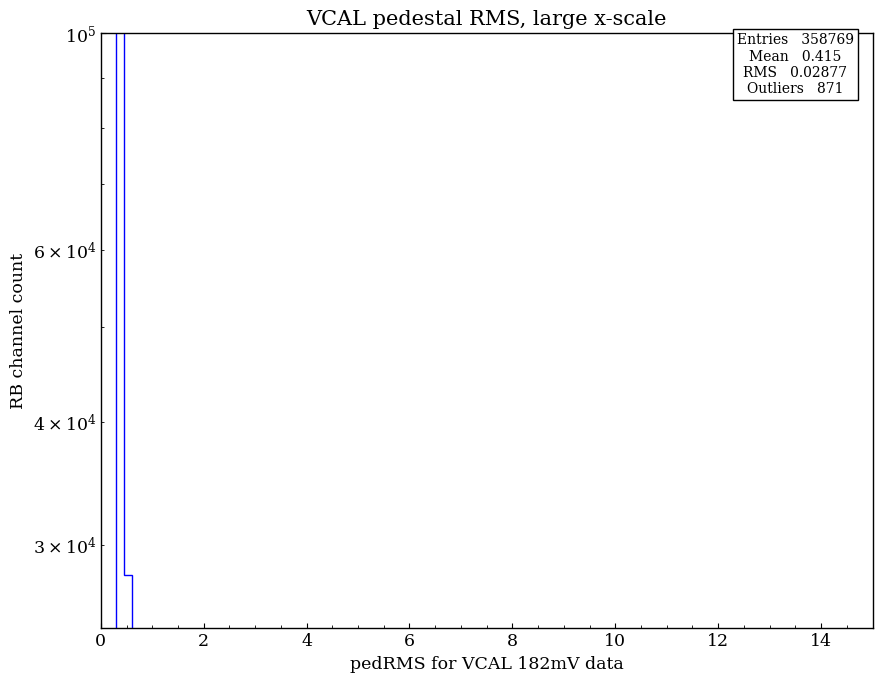

In [44]:
plotroot_trunc(vcal_ped,172,192,"avg ped for VCAL 182mV data","RB channel count","VCAL pedestal data",700000,xlo=172,log=True)
plotroot_trunc(vcal_pedrms,0,3,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS",200000)
plotroot_trunc(vcal_pedrms,0,15,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS, large x-scale",100000, log=True)

### Looking at tcal data

There is no reason to do this now, it was part of debugging the tcal constant calculation which is now stable. I am leaving it in the notebook as a reference 

In [4]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = 0.025   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = sp.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    perr = np.sqrt(np.diag(pcov))
    return {"perr": perr,"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}



In [6]:
errlists = []

for list in range(1024):
    errlists.append([])

for ind in range(len(files)):

    print(filename[ind])

    #cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[ind])
    cal = go.rust_api.events.RBCalibration()
    cal.from_file(calfolder_string + filename[ind],discard_data = False)

    for i in range(0,2,1):
    #for i in [200,]:
    
        ADC = cal.tcal_data[i]

        for j in range(3):

            volts = cal.voltages(ADC,j+1)
            tbins = cal.t_bin[j]

            for shift in range(1024):

                tbins_rolled = np.roll(tbins,shift)
                times = np.zeros((1024,))
                times[0] = 0
                for bin in range(1,1024,1):
                    times[bin] = times[bin-1] + tbins_rolled[(bin-1+ADC.header.stop_cell)%1024]
                    

                err = fit_sin(times[10:-10], volts[10:-10])["perr"]
                errlists[shift].append(err)

                #fig,ax = plt.subplots(figsize=(15,5))
                #plt.plot(times[10:-10],volts[10:-10])
                #
                #plt.ylim(-300,300)
                #plt.xlim(-1,100)
                #plt.grid()
                #plt.show()

            

            #fig,ax = plt.subplots(figsize=(15,5))
            #plt.plot(times,volts, label="tbins applied normally")
            #plt.plot((np.roll(times,-1))[:-2],volts[:-2], label="tbins shifted 1")
            #plt.title("TCAL sine wave for RB " + str(cal.rb_id) + " Ch " + str(j) + " Ev " + str(i))
            #plt.legend()
            #plt.ylim(-300,300)
            #plt.xlim(-1,100)
            #plt.grid()
            #plt.show()

old!
RB01_2024_02_01-02_08_03.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:21:53] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:21:53] -- Decoding 999 TCAL data events...
old!
RB02_2024_02_01-02_09_45.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:08] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:08] -- Decoding 997 TCAL data events...
old!
RB03_2024_02_01-02_11_29.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:22] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:22] -- Decoding 997 TCAL data events...
old!
RB04_2024_02_01-02_13_14.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:37] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:37] -- Decoding 999 

In [7]:
means = []
for i in range(len(errlists)):
    if np.mean(errlists[i]) < 0.02:
        print(i, np.mean(errlists[i]))
    means.append(np.mean(errlists[i]))

0 0.014698867499618046


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


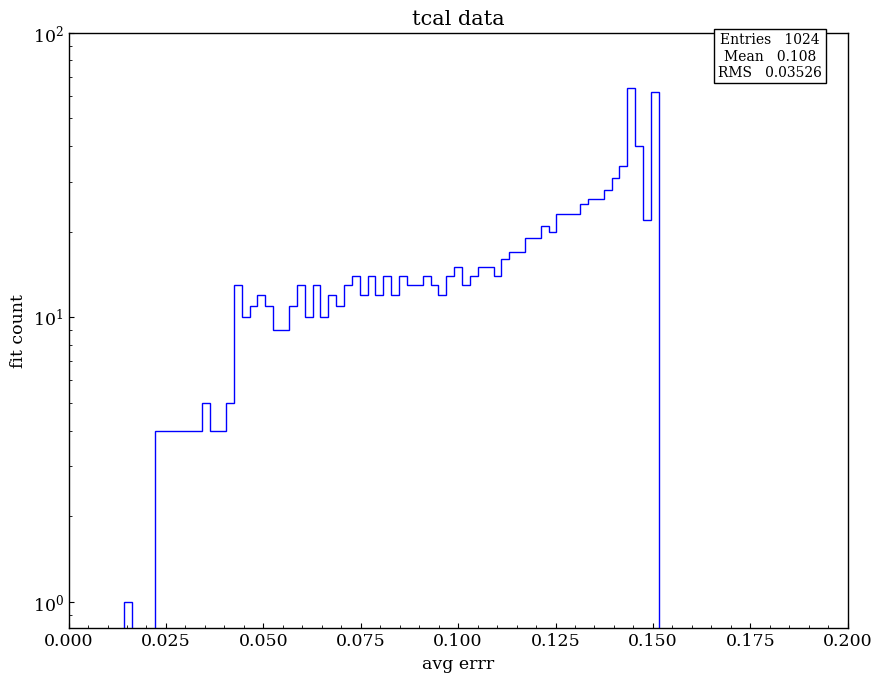

In [8]:

plotroot(means,0,0.2,"avg errr","fit count","tcal data",100, xlo=0,log=True)
